<a href="https://colab.research.google.com/github/afaqahmad99/PIAIC-Assignments/blob/master/Billionaires_from_2021_project_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
pip install chart_studio

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 64 kB 1.5 MB/s 
  Created wheel for retrying: filename=retrying-1.3.3-py3-none-any.whl size=11447 sha256=1f0b0e3d0c49e75ae606a7fcc920a332b6a6fca8239b310541ecd34da0d0eb72
  Stored in directory: /root/.cache/pip/wheels/f9/8d/8d/f6af3f7f9eea3553bc2fe6d53e4b287dad18b06a861ac56ddf
Successfully built retrying


In [4]:
#importing essential libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import warnings
import plotly.express as px
import plotly.io as pio
warnings.filterwarnings("ignore")

In [18]:
bl_data = pd.read_csv("/Billionaire.csv")


In [94]:
bl_data.head()

,Name,NetWorth,Country,Source,Rank,Age,Industry
0,Jeff Bezos,177.0,United States,Amazon,1,57.0,Technology
1,Elon Musk,151.0,United States,"Tesla, SpaceX",2,49.0,Automotive
2,Bernard Arnault & family,150.0,France,LVMH,3,72.0,Fashion & Retail
3,Bill Gates,124.0,United States,Microsoft,4,65.0,Technology
4,Mark Zuckerberg,97.0,United States,Facebook,5,36.0,Technology


In [24]:
bl_data.dtypes

Name         object
NetWorth     object
Country      object
Source       object
Rank          int64
Age         float64
Industry     object
dtype: object

In [25]:
bl_data.isnull().sum()

Name         0
NetWorth     0
Country      0
Source       0
Rank         0
Age         79
Industry     0
dtype: int64

In [26]:
bl_data.shape

(2755, 7)

In [27]:
#Converting the networth column for proper datatype and values
#Replacing/removing the $ sign from the column networth
bl_data["NetWorth"]= df.NetWorth.apply(lambda x:str(x).replace("$",""))

In [29]:
#replacing the "B"
bl_data["NetWorth"]= bl_data.NetWorth.apply(lambda x:str(x).replace("B",""))

In [31]:
#Removing the extra space in the values
bl_data["NetWorth"]= bl_data.NetWorth.apply(lambda x:str(x).replace(" ",""))

In [33]:
#Converting the networth column to float
bl_data["NetWorth"]= bl_data.NetWorth.apply(lambda x:float(x))

**EDA**

In [39]:
#Total value of Net worth of all billionaires
bl_data.NetWorth.sum()

13084.099999999999

In [40]:
#Top 20 Billionaires
t_bl= df.groupby("Name").NetWorth.sum().sort_values(ascending= False).head(20)
t_bl


Name
Jeff Bezos                               177.0
Elon Musk                                151.0
Bernard Arnault & family                 150.0
Bill Gates                               124.0
Mark Zuckerberg                           97.0
Warren Buffett                            96.0
Larry Ellison                             93.0
Larry Page                                91.5
Sergey Brin                               89.0
Mukesh Ambani                             84.5
Amancio Ortega                            77.0
Francoise Bettencourt Meyers & family     73.6
Zhong Shanshan                            68.9
Steve Ballmer                             68.7
Ma Huateng                                65.8
Carlos Slim Helu & family                 62.8
Alice Walton                              61.8
Jim Walton                                60.2
Rob Walton                                59.5
Michael Bloomberg                         59.0
Name: NetWorth, dtype: float64

In [74]:
dx= bl_data[bl_data["Rank"]<20]
ax= px.bar(dx,y= "NetWorth",x= "Name",color= "NetWorth",labels= {"NetWorth":"Networth(in Billions)"})
ax.show()

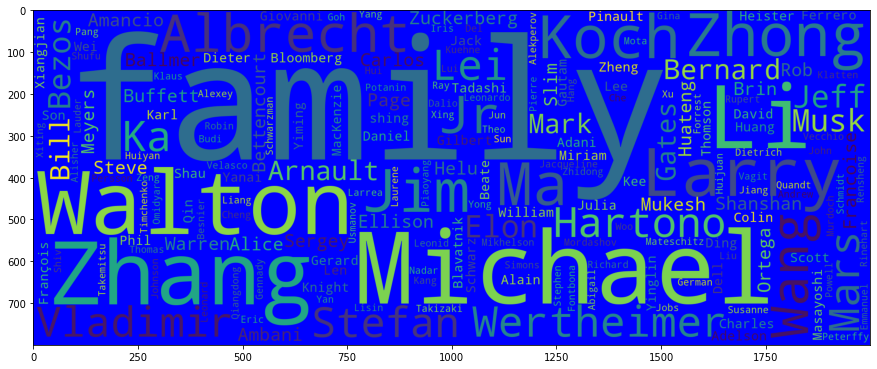

In [75]:
#Word cloud representing the top 100 billionaires
from wordcloud import WordCloud, STOPWORDS
dx= bl_data[bl_data["Rank"]<100]
plt.figure(figsize= (15,15))
words= " ".join(dx["Name"])
final = WordCloud(width = 2000, height = 800, background_color ="blue",min_font_size = 10).generate(words)
plt.imshow(final)
plt.axis("on") 
plt.show()   

In [73]:
#Countries with most contribution to the total value.
x= bl_data.groupby("Country").NetWorth.sum().sort_values(ascending= False).head(20).to_frame().reset_index()
ax= px.bar(x,y= "NetWorth",x= "Country",color= "NetWorth",labels= {"NetWorth":"Total value(in Billions)"})
ax.show()

In [67]:
#Countries with least contribution to the total value.
l_cont= bl_data.groupby("Country").NetWorth.sum().sort_values(ascending= False).tail(10)
l_cont

Country
Macao                  3.1
Qatar                  2.9
Slovakia               2.9
Hungary                2.7
Guernsey               2.6
Oman                   2.3
St. Kitts and Nevis    1.6
Tanzania               1.6
Zimbabwe               1.5
Nepal                  1.4
Name: NetWorth, dtype: float64

In [76]:
#Countries with most number of Billionaires(top 20)
x= pd.DataFrame(bl_data.Country.value_counts().head(20).reset_index().values, columns=["Country", "No of Billionaires"])
x["No of Billionaires"]=x["No of Billionaires"].apply(lambda x: int(x))
ax= px.bar(x,y= "No of Billionaires",x= "Country",color= "No of Billionaires")
ax.show()

In [79]:
#Countries with least number of Billionaires
bl_data.Country.value_counts().tail(20)


Georgia                 2
Portugal                2
Morocco                 2
Hungary                 2
Romania                 2
New Zealand             2
Qatar                   2
Slovakia                2
Iceland                 2
Zimbabwe                1
St. Kitts and Nevis     1
Tanzania                1
Macao                   1
Oman                    1
Guernsey                1
Venezuela               1
Eswatini (Swaziland)    1
Algeria                 1
Liechtenstein           1
Nepal                   1
Name: Country, dtype: int64

In [81]:
#Tree map representing most number of Billionaires
ax= px.treemap(bl_data,path=["Country"])
ax.show()


In [82]:
#Word cloud representing the top Sources
bl_data.groupby("Source").NetWorth.sum().sort_values(ascending= False).head(20)

Source
real estate        686.1
diversified        378.2
investments        339.2
pharmaceuticals    335.3
software           275.8
hedge funds        240.1
Amazon             230.0
e-commerce         225.5
Walmart            220.2
Google             216.4
Microsoft          197.7
retail             159.9
Tesla, SpaceX      151.0
LVMH               150.0
Facebook           142.4
mining             141.6
telecom            126.4
private equity     124.0
chemicals          106.4
banking            106.4
Name: NetWorth, dtype: float64

In [85]:
x= bl_data.groupby("Source").NetWorth.sum().sort_values(ascending= False).head(20).to_frame().reset_index()
ax= px.bar(x,y= "NetWorth",x= "Source",color= "NetWorth",labels= {"NetWorth":"Total value(in Billions)"})
ax.show()

In [87]:
#Sources producing least value
bl_data.groupby("Source").NetWorth.sum().sort_values(ascending= False).tail(20)

Source
Fiberglass                           1.0
Shoes                                1.0
flavors and fragrances               1.0
gold mining                          1.0
shipbuilding, industrial machines    1.0
high speed trading                   1.0
defense contractor                   1.0
pharmacy                             1.0
cosmetics, reality TV                1.0
internet services                    1.0
fisheries                            1.0
stock trading                        1.0
stock trading app                    1.0
Citigroup                            1.0
teeth aligners                       1.0
telecom, lotteries, insurance        1.0
tiles                                1.0
packaged meats                       1.0
toll roads                           1.0
artificial turf                      1.0
Name: NetWorth, dtype: float64

In [89]:
ax= px.treemap(bl_data,path=["Source"])
ax.show()

In [128]:
#creating separate dataframe for Technology Industry
x= bl_data[bl_data["Industry"]=="Technology"]

In [129]:
len(x)

365

In [130]:
x.NetWorth.sum()

2456.7

 2456.7 Billion is overall worth related to Technology Industry

In [131]:
#Top 20 Billionaires from Technology Industry
x.groupby("Name").NetWorth.sum().sort_values(ascending= False).head(20)


Name
Jeff Bezos               177.0
Bill Gates               124.0
Mark Zuckerberg           97.0
Larry Ellison             93.0
Larry Page                91.5
Sergey Brin               89.0
Steve Ballmer             68.7
Ma Huateng                65.8
Colin Zheng Huang         55.3
MacKenzie Scott           53.0
Jack Ma                   48.4
Michael Dell              45.1
Zhang Yiming              35.6
William Lei Ding          33.0
Wang Xing                 26.1
Shiv Nadar                23.5
Zhang Zhidong             23.4
Lei Jun                   23.0
Richard Qiangdong Liu     22.4
Pierre Omidyar            21.4
Name: NetWorth, dtype: float64

In [145]:
dx= x.groupby("Name").NetWorth.sum().sort_values(ascending= False).head(20).to_frame().reset_index()


In [146]:
#Pie chart representation of Technology Industry Billionaires(top 20)
ax= px.pie(dx,names="Name",values= "NetWorth" )
ax.show()

In [148]:
#Tree map representing of Top sources in Technology Industry
ax= px.treemap(x,path=["Source"])
ax.show()

In [149]:
#Top 10 sources in Technology Industry
x.Source.value_counts().head(10)

software             61
e-commerce           20
electronics          16
semiconductors       15
online games         10
business software     7
software services     7
Facebook              6
technology            6
cloud computing       5
Name: Source, dtype: int64

# **Final Conclusions:**

-2755 number of billionaires with 13 trillion dollars of net worth

-Jeff Bezos and Elon Musk are richest on the planet

-USA and China produce most number of billionaires and also total values

-USA alone has 724 Billionaires contributing more than 4 Trillion dollars of networth

-Real Estate and diversified sources contribute to the highest value of in terms of sources followed by Investments

-365 Billionaires in Technology Industry

-software and e-commerce are the top sources in Technology Industry